In [20]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.transformer import GPT
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset
from transformers_simple.char_util import generate_sample

In [21]:
block_size  = 64
embed_size  = 128
hidden_size = 512
attn_hidden_size = 128
num_heads   = 4
vocab_size  = 39
output_size = vocab_size
num_transformer_blocks = 4

log_interval = 100
epochs = 1
learning_rate = 1.0e-3
device = torch.device('cpu')

In [22]:
dataset = CharDataset(filename="../datasets/shakespeare.txt", block_size=block_size)

dataset_train, dataset_val = dataset.train_test_split(train_fraction=0.9)

In [23]:
dataset.vocab_size

39

In [24]:
dataset.length

1115394

In [25]:
net = GPT(vocab_size=vocab_size, 
          block_size=block_size,
          embed_size=embed_size,
          hidden_size=hidden_size,
          attn_hidden_size=attn_hidden_size,
          output_size=output_size,
          num_transformer_blocks=num_transformer_blocks,
          num_heads=num_heads,
         attn_dropout=0.0,
          attn_block_dropout=0.0,
         attn_residual_dropout=0.0,
         embed_dropout=0.0)

In [26]:
x = dataset[0][0].view(1,-1)

In [27]:
x

tensor([[18, 21, 30, 31, 32,  1, 15, 21, 32, 21, 38, 17, 26, 10,  0, 14, 17, 18,
         27, 30, 17,  1, 35, 17,  1, 28, 30, 27, 15, 17, 17, 16,  1, 13, 26, 37,
          1, 18, 33, 30, 32, 20, 17, 30,  6,  1, 20, 17, 13, 30,  1, 25, 17,  1,
         31, 28, 17, 13, 23,  8,  0,  0, 13, 24]])

In [28]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    #return loss(o.view(-1,vocab_size),y.view(-1))

    return loss(o[:,-1],y[:,-1])

In [29]:
trainer = Trainer(model=net, 
                  dataset=dataset_train, 
                  loss_fn=loss_fn, 
                  batch_size=12, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device,
                 max_iters=20e3,
                 val_dataset=dataset_val,
                 val_interval=400,
                 max_val_iters=100,
                 warmup_iters=100,
                 lr_decay_iters=4000,
                 min_lr=5e-4)

In [30]:
trainer.run()

Train Epoch: 0 [0/1003790 (0%)]	Loss: 3.931147


100it [00:01, 60.03it/s]


Train Epoch: 0 [1200/1003790 (0%)]	Loss: 2.784386
Train Epoch: 0 [2400/1003790 (0%)]	Loss: 2.783554
Train Epoch: 0 [3600/1003790 (0%)]	Loss: 2.442988
Train Epoch: 0 [4800/1003790 (0%)]	Loss: 2.475434


100it [00:01, 60.03it/s]


Train Epoch: 0 [6000/1003790 (1%)]	Loss: 3.211884
Train Epoch: 0 [7200/1003790 (1%)]	Loss: 2.607177
Train Epoch: 0 [8400/1003790 (1%)]	Loss: 2.461428
Train Epoch: 0 [9600/1003790 (1%)]	Loss: 2.579180


100it [00:01, 57.68it/s]


Train Epoch: 0 [10800/1003790 (1%)]	Loss: 2.818612
Train Epoch: 0 [12000/1003790 (1%)]	Loss: 3.358787
Train Epoch: 0 [13200/1003790 (1%)]	Loss: 2.287187
Train Epoch: 0 [14400/1003790 (1%)]	Loss: 2.757077


100it [00:01, 59.02it/s]


Train Epoch: 0 [15600/1003790 (2%)]	Loss: 2.541066
Train Epoch: 0 [16800/1003790 (2%)]	Loss: 2.604807
Train Epoch: 0 [18000/1003790 (2%)]	Loss: 2.034256
Train Epoch: 0 [19200/1003790 (2%)]	Loss: 2.353429


100it [00:01, 58.26it/s]


Train Epoch: 0 [20400/1003790 (2%)]	Loss: 1.978457
Train Epoch: 0 [21600/1003790 (2%)]	Loss: 2.197606
Train Epoch: 0 [22800/1003790 (2%)]	Loss: 2.629872
Train Epoch: 0 [24000/1003790 (2%)]	Loss: 2.635404


100it [00:01, 58.96it/s]


Train Epoch: 0 [25200/1003790 (3%)]	Loss: 2.297335
Train Epoch: 0 [26400/1003790 (3%)]	Loss: 1.958848
Train Epoch: 0 [27600/1003790 (3%)]	Loss: 2.178771
Train Epoch: 0 [28800/1003790 (3%)]	Loss: 2.708079


100it [00:01, 57.84it/s]


Train Epoch: 0 [30000/1003790 (3%)]	Loss: 2.091126
Train Epoch: 0 [31200/1003790 (3%)]	Loss: 3.010451
Train Epoch: 0 [32400/1003790 (3%)]	Loss: 2.333282
Train Epoch: 0 [33600/1003790 (3%)]	Loss: 2.601863


100it [00:01, 56.10it/s]


Train Epoch: 0 [34800/1003790 (3%)]	Loss: 1.901044
Train Epoch: 0 [36000/1003790 (4%)]	Loss: 3.000514
Train Epoch: 0 [37200/1003790 (4%)]	Loss: 2.429452
Train Epoch: 0 [38400/1003790 (4%)]	Loss: 2.166781


100it [00:01, 54.39it/s]


Train Epoch: 0 [39600/1003790 (4%)]	Loss: 2.236042
Train Epoch: 0 [40800/1003790 (4%)]	Loss: 2.960463
Train Epoch: 0 [42000/1003790 (4%)]	Loss: 3.361458
Train Epoch: 0 [43200/1003790 (4%)]	Loss: 2.373480


100it [00:01, 56.33it/s]


Train Epoch: 0 [44400/1003790 (4%)]	Loss: 2.542754
Train Epoch: 0 [45600/1003790 (5%)]	Loss: 1.290008
Train Epoch: 0 [46800/1003790 (5%)]	Loss: 2.496934
Train Epoch: 0 [48000/1003790 (5%)]	Loss: 1.711182


100it [00:01, 56.47it/s]


Train Epoch: 0 [49200/1003790 (5%)]	Loss: 2.331131
Train Epoch: 0 [50400/1003790 (5%)]	Loss: 2.627188
Train Epoch: 0 [51600/1003790 (5%)]	Loss: 2.066271
Train Epoch: 0 [52800/1003790 (5%)]	Loss: 2.391864


100it [00:01, 57.34it/s]


Train Epoch: 0 [54000/1003790 (5%)]	Loss: 2.380192
Train Epoch: 0 [55200/1003790 (5%)]	Loss: 2.583845
Train Epoch: 0 [56400/1003790 (6%)]	Loss: 2.471483
Train Epoch: 0 [57600/1003790 (6%)]	Loss: 2.362730


100it [00:01, 57.74it/s]


Train Epoch: 0 [58800/1003790 (6%)]	Loss: 2.093094
Train Epoch: 0 [60000/1003790 (6%)]	Loss: 2.528731
Train Epoch: 0 [61200/1003790 (6%)]	Loss: 2.355661
Train Epoch: 0 [62400/1003790 (6%)]	Loss: 3.561280


100it [00:01, 56.12it/s]


Train Epoch: 0 [63600/1003790 (6%)]	Loss: 3.782572
Train Epoch: 0 [64800/1003790 (6%)]	Loss: 1.542089
Train Epoch: 0 [66000/1003790 (7%)]	Loss: 1.573552
Train Epoch: 0 [67200/1003790 (7%)]	Loss: 3.147835


100it [00:01, 58.09it/s]


Train Epoch: 0 [68400/1003790 (7%)]	Loss: 1.766370
Train Epoch: 0 [69600/1003790 (7%)]	Loss: 2.371480
Train Epoch: 0 [70800/1003790 (7%)]	Loss: 1.856690
Train Epoch: 0 [72000/1003790 (7%)]	Loss: 1.650585


100it [00:01, 57.01it/s]


Train Epoch: 0 [73200/1003790 (7%)]	Loss: 2.483328
Train Epoch: 0 [74400/1003790 (7%)]	Loss: 2.226073
Train Epoch: 0 [75600/1003790 (8%)]	Loss: 1.841793
Train Epoch: 0 [76800/1003790 (8%)]	Loss: 2.090995


100it [00:01, 58.82it/s]


Train Epoch: 0 [78000/1003790 (8%)]	Loss: 1.626987
Train Epoch: 0 [79200/1003790 (8%)]	Loss: 2.127433
Train Epoch: 0 [80400/1003790 (8%)]	Loss: 2.563217
Train Epoch: 0 [81600/1003790 (8%)]	Loss: 2.439982


100it [00:01, 56.87it/s]


Train Epoch: 0 [82800/1003790 (8%)]	Loss: 2.102292
Train Epoch: 0 [84000/1003790 (8%)]	Loss: 1.596392
Train Epoch: 0 [85200/1003790 (8%)]	Loss: 1.956234
Train Epoch: 0 [86400/1003790 (9%)]	Loss: 2.193117


100it [00:01, 58.25it/s]


Train Epoch: 0 [87600/1003790 (9%)]	Loss: 2.213787
Train Epoch: 0 [88800/1003790 (9%)]	Loss: 1.562588
Train Epoch: 0 [90000/1003790 (9%)]	Loss: 2.489858
Train Epoch: 0 [91200/1003790 (9%)]	Loss: 2.171894


100it [00:01, 58.40it/s]


Train Epoch: 0 [92400/1003790 (9%)]	Loss: 1.502719
Train Epoch: 0 [93600/1003790 (9%)]	Loss: 1.991882
Train Epoch: 0 [94800/1003790 (9%)]	Loss: 2.357767
Train Epoch: 0 [96000/1003790 (10%)]	Loss: 2.386343


100it [00:01, 58.14it/s]


Train Epoch: 0 [97200/1003790 (10%)]	Loss: 1.687073
Train Epoch: 0 [98400/1003790 (10%)]	Loss: 2.172868
Train Epoch: 0 [99600/1003790 (10%)]	Loss: 2.327226
Train Epoch: 0 [100800/1003790 (10%)]	Loss: 1.772896


100it [00:01, 59.12it/s]


Train Epoch: 0 [102000/1003790 (10%)]	Loss: 1.655053
Train Epoch: 0 [103200/1003790 (10%)]	Loss: 2.181849
Train Epoch: 0 [104400/1003790 (10%)]	Loss: 2.928707
Train Epoch: 0 [105600/1003790 (11%)]	Loss: 2.192085


100it [00:01, 55.69it/s]


Train Epoch: 0 [106800/1003790 (11%)]	Loss: 2.345242
Train Epoch: 0 [108000/1003790 (11%)]	Loss: 1.968544
Train Epoch: 0 [109200/1003790 (11%)]	Loss: 2.669532
Train Epoch: 0 [110400/1003790 (11%)]	Loss: 1.574526


100it [00:01, 58.77it/s]


Train Epoch: 0 [111600/1003790 (11%)]	Loss: 2.220617
Train Epoch: 0 [112800/1003790 (11%)]	Loss: 1.885253
Train Epoch: 0 [114000/1003790 (11%)]	Loss: 1.861618
Train Epoch: 0 [115200/1003790 (11%)]	Loss: 1.965533


100it [00:01, 57.27it/s]


Train Epoch: 0 [116400/1003790 (12%)]	Loss: 2.886449
Train Epoch: 0 [117600/1003790 (12%)]	Loss: 1.492636
Train Epoch: 0 [118800/1003790 (12%)]	Loss: 2.858033
Train Epoch: 0 [120000/1003790 (12%)]	Loss: 2.019562


100it [00:01, 57.51it/s]


Train Epoch: 0 [121200/1003790 (12%)]	Loss: 2.281722
Train Epoch: 0 [122400/1003790 (12%)]	Loss: 2.048084
Train Epoch: 0 [123600/1003790 (12%)]	Loss: 2.385313
Train Epoch: 0 [124800/1003790 (12%)]	Loss: 2.203408


100it [00:01, 57.80it/s]


Train Epoch: 0 [126000/1003790 (13%)]	Loss: 1.634296
Train Epoch: 0 [127200/1003790 (13%)]	Loss: 2.122904
Train Epoch: 0 [128400/1003790 (13%)]	Loss: 1.485457
Train Epoch: 0 [129600/1003790 (13%)]	Loss: 1.836976


100it [00:01, 57.10it/s]


Train Epoch: 0 [130800/1003790 (13%)]	Loss: 1.537055
Train Epoch: 0 [132000/1003790 (13%)]	Loss: 2.090468
Train Epoch: 0 [133200/1003790 (13%)]	Loss: 2.409370
Train Epoch: 0 [134400/1003790 (13%)]	Loss: 2.150493


100it [00:01, 56.93it/s]


Train Epoch: 0 [135600/1003790 (14%)]	Loss: 1.966526
Train Epoch: 0 [136800/1003790 (14%)]	Loss: 1.860052
Train Epoch: 0 [138000/1003790 (14%)]	Loss: 2.259533
Train Epoch: 0 [139200/1003790 (14%)]	Loss: 2.115521


100it [00:01, 56.86it/s]


Train Epoch: 0 [140400/1003790 (14%)]	Loss: 1.617299
Train Epoch: 0 [141600/1003790 (14%)]	Loss: 2.233370
Train Epoch: 0 [142800/1003790 (14%)]	Loss: 2.037000
Train Epoch: 0 [144000/1003790 (14%)]	Loss: 1.332570


100it [00:01, 56.04it/s]


Train Epoch: 0 [145200/1003790 (14%)]	Loss: 2.291271
Train Epoch: 0 [146400/1003790 (15%)]	Loss: 2.295530
Train Epoch: 0 [147600/1003790 (15%)]	Loss: 2.597036
Train Epoch: 0 [148800/1003790 (15%)]	Loss: 1.821818


100it [00:01, 57.91it/s]


Train Epoch: 0 [150000/1003790 (15%)]	Loss: 2.212482
Train Epoch: 0 [151200/1003790 (15%)]	Loss: 1.968192
Train Epoch: 0 [152400/1003790 (15%)]	Loss: 1.546118
Train Epoch: 0 [153600/1003790 (15%)]	Loss: 1.529695


100it [00:01, 57.68it/s]


Train Epoch: 0 [154800/1003790 (15%)]	Loss: 2.490765
Train Epoch: 0 [156000/1003790 (16%)]	Loss: 1.828544
Train Epoch: 0 [157200/1003790 (16%)]	Loss: 1.677739
Train Epoch: 0 [158400/1003790 (16%)]	Loss: 2.293457


100it [00:01, 52.52it/s]


Train Epoch: 0 [159600/1003790 (16%)]	Loss: 2.078845
Train Epoch: 0 [160800/1003790 (16%)]	Loss: 1.794326
Train Epoch: 0 [162000/1003790 (16%)]	Loss: 1.549130
Train Epoch: 0 [163200/1003790 (16%)]	Loss: 3.298359


100it [00:01, 57.60it/s]


Train Epoch: 0 [164400/1003790 (16%)]	Loss: 2.490183
Train Epoch: 0 [165600/1003790 (16%)]	Loss: 2.258790
Train Epoch: 0 [166800/1003790 (17%)]	Loss: 1.836246
Train Epoch: 0 [168000/1003790 (17%)]	Loss: 2.228126


100it [00:01, 56.81it/s]


Train Epoch: 0 [169200/1003790 (17%)]	Loss: 1.885286
Train Epoch: 0 [170400/1003790 (17%)]	Loss: 2.597368
Train Epoch: 0 [171600/1003790 (17%)]	Loss: 2.414746
Train Epoch: 0 [172800/1003790 (17%)]	Loss: 2.429929


100it [00:01, 56.96it/s]


Train Epoch: 0 [174000/1003790 (17%)]	Loss: 1.205903
Train Epoch: 0 [175200/1003790 (17%)]	Loss: 1.500122
Train Epoch: 0 [176400/1003790 (18%)]	Loss: 2.545255
Train Epoch: 0 [177600/1003790 (18%)]	Loss: 1.384259


100it [00:01, 54.56it/s]


Train Epoch: 0 [178800/1003790 (18%)]	Loss: 2.661186
Train Epoch: 0 [180000/1003790 (18%)]	Loss: 1.176564
Train Epoch: 0 [181200/1003790 (18%)]	Loss: 2.586034
Train Epoch: 0 [182400/1003790 (18%)]	Loss: 2.763888


100it [00:01, 55.84it/s]


Train Epoch: 0 [183600/1003790 (18%)]	Loss: 1.323988
Train Epoch: 0 [184800/1003790 (18%)]	Loss: 2.005145
Train Epoch: 0 [186000/1003790 (19%)]	Loss: 1.820800
Train Epoch: 0 [187200/1003790 (19%)]	Loss: 1.562309


100it [00:01, 56.07it/s]


Train Epoch: 0 [188400/1003790 (19%)]	Loss: 1.500528
Train Epoch: 0 [189600/1003790 (19%)]	Loss: 1.639777
Train Epoch: 0 [190800/1003790 (19%)]	Loss: 1.857115
Train Epoch: 0 [192000/1003790 (19%)]	Loss: 1.618366


100it [00:01, 56.27it/s]


Train Epoch: 0 [193200/1003790 (19%)]	Loss: 1.619090
Train Epoch: 0 [194400/1003790 (19%)]	Loss: 2.297018
Train Epoch: 0 [195600/1003790 (19%)]	Loss: 1.697300
Train Epoch: 0 [196800/1003790 (20%)]	Loss: 1.444588


100it [00:01, 57.24it/s]


Train Epoch: 0 [198000/1003790 (20%)]	Loss: 1.404579
Train Epoch: 0 [199200/1003790 (20%)]	Loss: 1.664108
Train Epoch: 0 [200400/1003790 (20%)]	Loss: 2.218629
Train Epoch: 0 [201600/1003790 (20%)]	Loss: 1.920340


100it [00:01, 59.03it/s]


Train Epoch: 0 [202800/1003790 (20%)]	Loss: 2.340465
Train Epoch: 0 [204000/1003790 (20%)]	Loss: 1.901696
Train Epoch: 0 [205200/1003790 (20%)]	Loss: 1.547934
Train Epoch: 0 [206400/1003790 (21%)]	Loss: 1.987650


100it [00:01, 51.36it/s]


Train Epoch: 0 [207600/1003790 (21%)]	Loss: 2.069442
Train Epoch: 0 [208800/1003790 (21%)]	Loss: 2.018117
Train Epoch: 0 [210000/1003790 (21%)]	Loss: 1.831993
Train Epoch: 0 [211200/1003790 (21%)]	Loss: 1.939371


100it [00:01, 57.82it/s]


Train Epoch: 0 [212400/1003790 (21%)]	Loss: 1.846254
Train Epoch: 0 [213600/1003790 (21%)]	Loss: 1.444169
Train Epoch: 0 [214800/1003790 (21%)]	Loss: 2.305841
Train Epoch: 0 [216000/1003790 (22%)]	Loss: 1.505369


100it [00:01, 58.44it/s]


Train Epoch: 0 [217200/1003790 (22%)]	Loss: 1.780397
Train Epoch: 0 [218400/1003790 (22%)]	Loss: 2.285678
Train Epoch: 0 [219600/1003790 (22%)]	Loss: 1.794917
Train Epoch: 0 [220800/1003790 (22%)]	Loss: 2.634101


100it [00:01, 57.28it/s]


Train Epoch: 0 [222000/1003790 (22%)]	Loss: 2.155777
Train Epoch: 0 [223200/1003790 (22%)]	Loss: 2.782750
Train Epoch: 0 [224400/1003790 (22%)]	Loss: 1.429145
Train Epoch: 0 [225600/1003790 (22%)]	Loss: 2.188687


100it [00:01, 58.01it/s]


Train Epoch: 0 [226800/1003790 (23%)]	Loss: 2.054889
Train Epoch: 0 [228000/1003790 (23%)]	Loss: 1.721204
Train Epoch: 0 [229200/1003790 (23%)]	Loss: 1.991564
Train Epoch: 0 [230400/1003790 (23%)]	Loss: 1.899053


100it [00:01, 58.67it/s]


Train Epoch: 0 [231600/1003790 (23%)]	Loss: 1.352103
Train Epoch: 0 [232800/1003790 (23%)]	Loss: 1.594674
Train Epoch: 0 [234000/1003790 (23%)]	Loss: 1.742956
Train Epoch: 0 [235200/1003790 (23%)]	Loss: 2.238707


100it [00:01, 56.01it/s]


Train Epoch: 0 [236400/1003790 (24%)]	Loss: 1.553856
Train Epoch: 0 [237600/1003790 (24%)]	Loss: 2.591289
Train Epoch: 0 [238800/1003790 (24%)]	Loss: 2.110701
Train Epoch: 0 [240000/1003790 (24%)]	Loss: 1.285173


100it [00:01, 57.89it/s]


In [31]:
x = dataset[1][0].view(1,-1)

o = net(x)

In [32]:
o.size()

torch.Size([1, 64, 39])

In [33]:
torch.nn.functional.softmax(o[0,-1], dim=0)

tensor([9.7789e-03, 6.4115e-01, 1.3916e-03, 7.1765e-07, 9.7549e-07, 1.2703e-02,
        1.2515e-02, 9.5906e-03, 2.3944e-03, 8.5195e-07, 2.3107e-03, 2.5162e-03,
        9.6224e-04, 1.9954e-02, 2.8406e-04, 1.7409e-04, 7.4163e-03, 9.0907e-03,
        3.9337e-03, 2.1645e-04, 4.6408e-04, 4.2743e-02, 2.4330e-04, 2.0130e-04,
        4.9877e-03, 5.6879e-04, 3.3211e-04, 6.7345e-02, 4.2287e-05, 9.3352e-05,
        1.9730e-04, 2.6699e-03, 9.2103e-04, 3.7737e-03, 2.7883e-03, 9.5065e-04,
        1.0217e-04, 1.3512e-01, 6.8496e-05], grad_fn=<SoftmaxBackward0>)

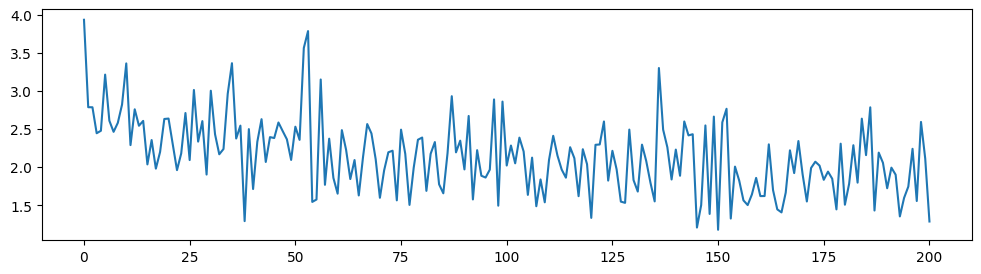

In [34]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()

In [35]:
T = 200

x = dataset.data[100:100+block_size]
x = [dataset.char_to_index[c] for c in x]
print(x)
def net_out(x):
    o = net(x)
    return o[:,-1]

o = generate_sample(x, net_out, length=T)

[1, 13, 30, 17, 1, 13, 24, 24, 1, 30, 17, 31, 27, 24, 34, 17, 16, 1, 30, 13, 32, 20, 17, 30, 1, 32, 27, 1, 16, 21, 17, 1, 32, 20, 13, 26, 1, 32, 27, 1, 18, 13, 25, 21, 31, 20, 12, 0, 0, 13, 24, 24, 10, 0, 30, 17, 31, 27, 24, 34, 17, 16, 8, 1]


In [36]:
o = [dataset.index_to_char[c] for c in o]

In [37]:
"".join(o)

'having of messever bide enserd loves,\nand hallver rugh plike men mume\no lorden becyind ove cuty ford say, nime beace,\nso me in seeemist witizen henror, but hous\ngoke a mins,\nmurser morcetwing fake of '

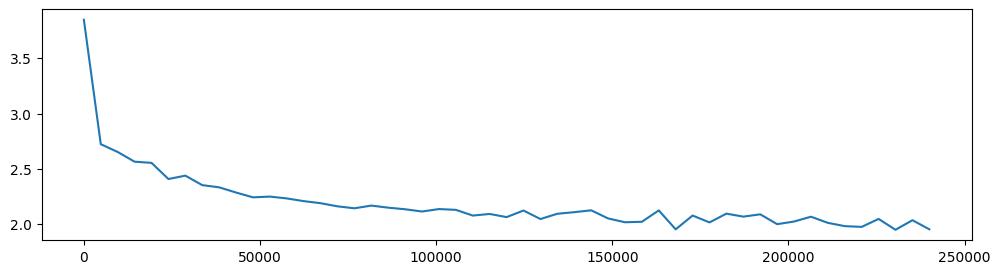

In [38]:
plt.figure(figsize=(12,3))
plt.plot(trainer.val_loss_iters, trainer.val_loss_history)
plt.show()